# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [42]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import confusion_matrix

# Calcula y muestra una matriz de confusión utilizando Seaborn
def calcularMatrizConfusion(y_test, y_pred):    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1,figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show

In [12]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
spaceship.dropna(inplace=True)

In [14]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]

In [15]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

In [16]:
spaceship['CryoSleep'] = spaceship['CryoSleep'].astype(int)
spaceship['VIP'] = spaceship['VIP'].astype(int)

spaceship = pd.get_dummies(spaceship, columns = ['HomePlanet', 'Cabin', 'Destination'])

spaceship_boolean = spaceship.select_dtypes(include=['bool']).columns
spaceship[spaceship_boolean] = spaceship[spaceship_boolean].astype(bool).astype(int)

**Perform Train Test Split**

In [29]:
y = spaceship['Transported']
X = spaceship.drop(columns=['Transported'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [31]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm2 = normalizer.transform(X_train)
X_test_norm2 = normalizer.transform(X_test)
X_train_norm2 = pd.DataFrame(X_train_norm2, columns = X_train.columns)
X_test_norm2 = pd.DataFrame(X_test_norm2, columns = X_test.columns)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [94]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples = 0.8)
bagging.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100)

Accuracy: 0.789712556732224
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       661
           1       0.79      0.79      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



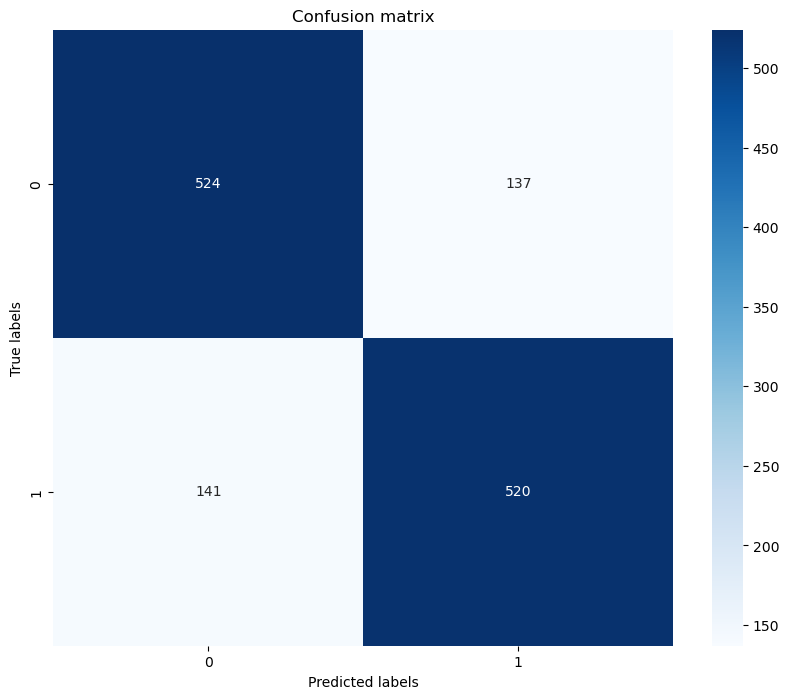

In [95]:
y_pred = bagging.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)

In [96]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples = 0.8)
bagging.fit(X_train_norm2, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100)

Accuracy: 0.6422087745839636
              precision    recall  f1-score   support

           0       0.69      0.51      0.59       661
           1       0.61      0.77      0.68       661

    accuracy                           0.64      1322
   macro avg       0.65      0.64      0.64      1322
weighted avg       0.65      0.64      0.64      1322



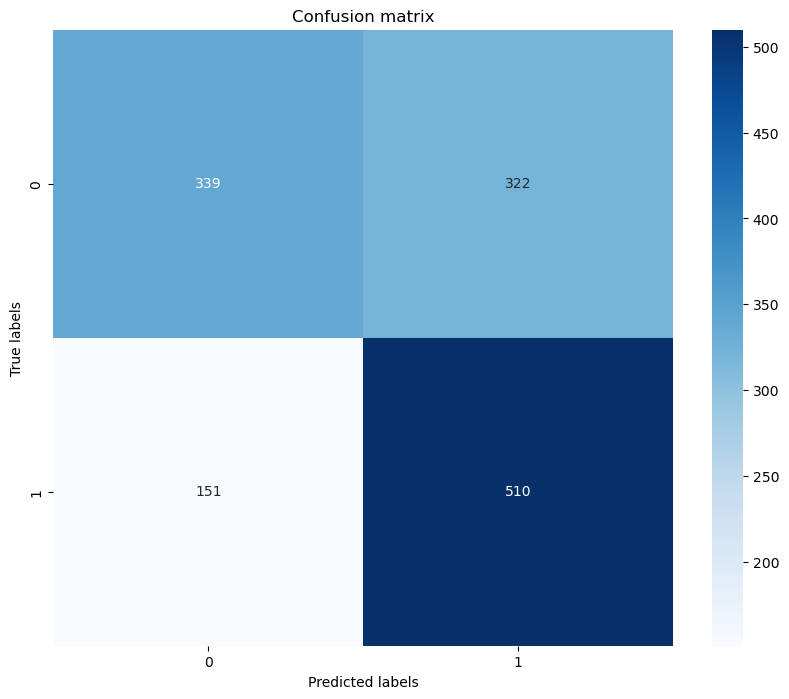

In [97]:
y_pred2 = bagging.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
calcularMatrizConfusion(y_test, y_pred2)

- Random Forests

In [72]:
random_forest = RandomForestClassifier(n_estimators=100,max_samples = 0.8)
random_forest.fit(X_train_norm, y_train)

RandomForestClassifier(max_samples=0.8)

Accuracy: 0.7859304084720121
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       661
           1       0.79      0.78      0.78       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



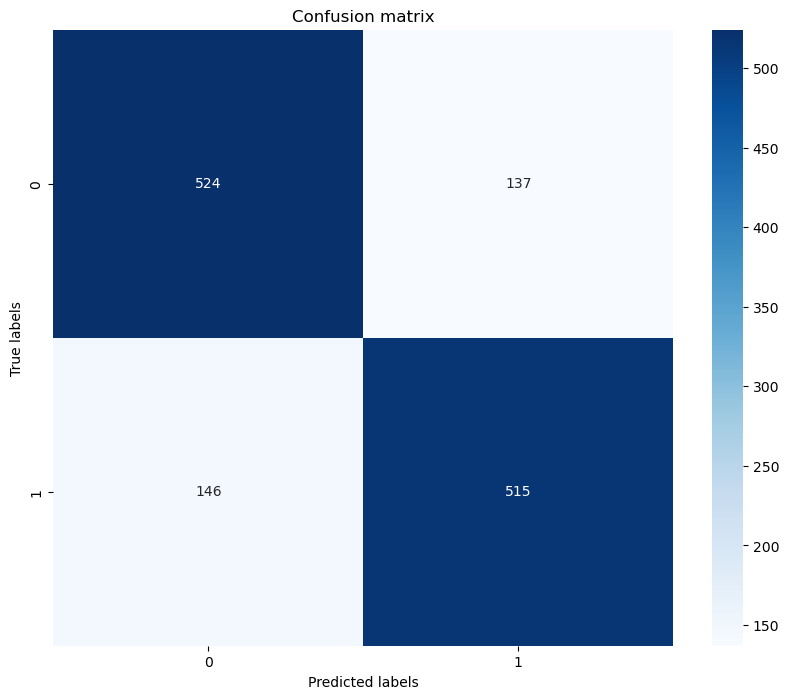

In [73]:
y_pred = random_forest.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)

In [89]:
random_forest = RandomForestClassifier(n_estimators=100,max_samples = 0.8)
random_forest.fit(X_train_norm2, y_train)

RandomForestClassifier(max_samples=0.8)

Accuracy: 0.7859304084720121
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       661
           1       0.80      0.77      0.78       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



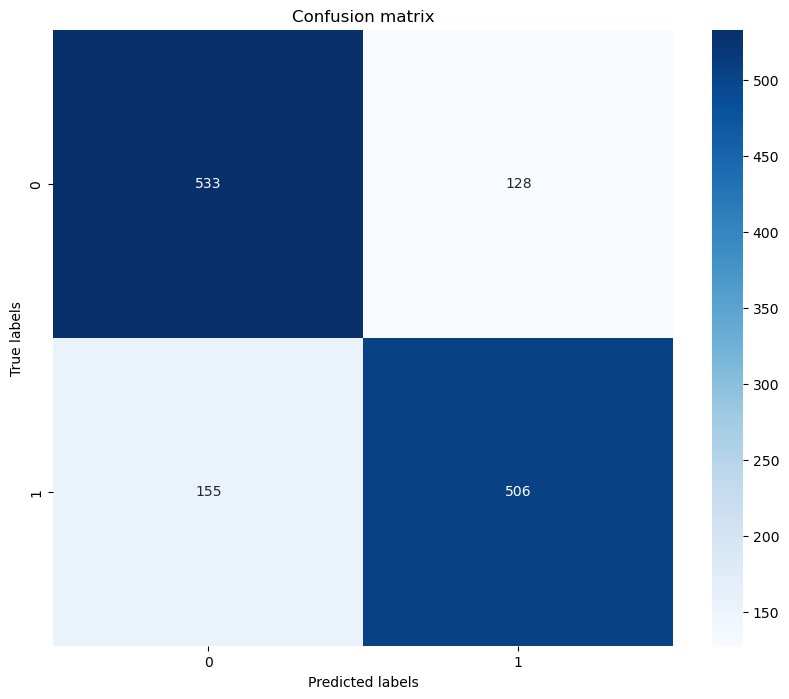

In [90]:
y_pred2 = random_forest.predict(X_test_norm2)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
calcularMatrizConfusion(y_test, y_pred2)

- Gradient Boosting

In [66]:
grd_boosting = GradientBoostingClassifier(n_estimators=100)
grd_boosting.fit(X_train_norm, y_train)

GradientBoostingClassifier()

Accuracy: 0.7859304084720121
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       661
           1       0.76      0.83      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



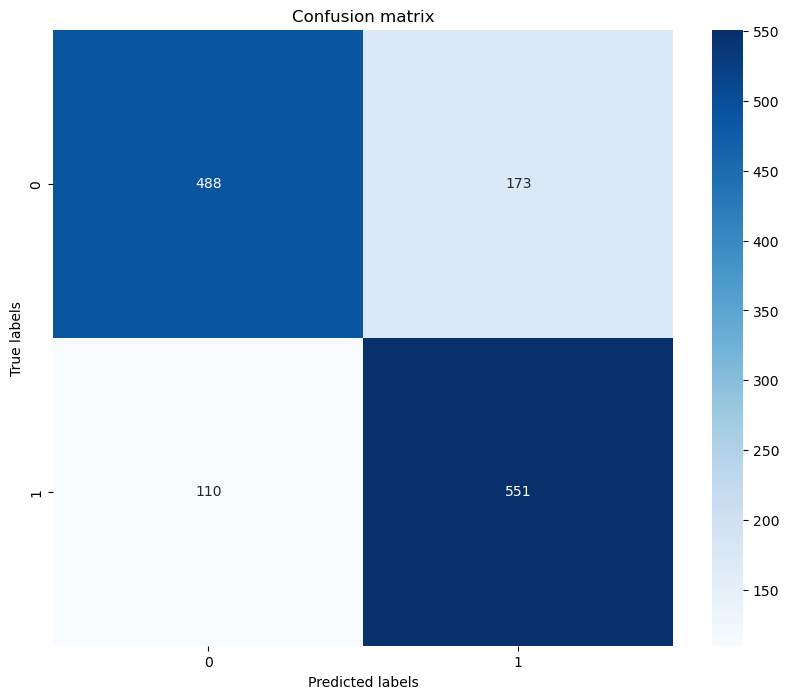

In [67]:
y_pred = grd_boosting.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)

In [87]:
grd_boosting = GradientBoostingClassifier(n_estimators=100)
grd_boosting.fit(X_train_norm2, y_train)

GradientBoostingClassifier()

Accuracy: 0.7859304084720121
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       661
           1       0.76      0.83      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



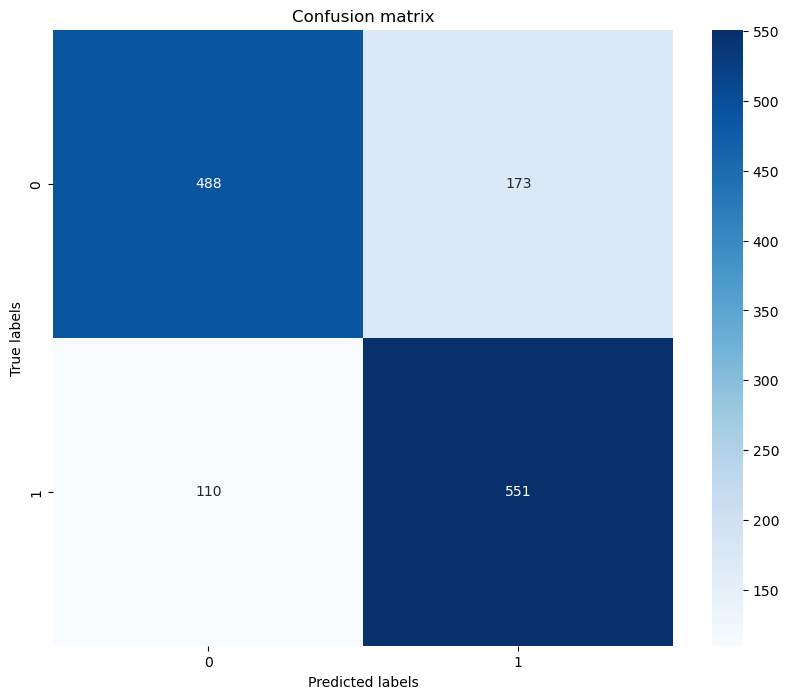

In [88]:
y_pred2 = grd_boosting.predict(X_test_norm2)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
calcularMatrizConfusion(y_test, y_pred2)

- Adaptive Boosting

In [84]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=200)
adaboost.fit(X_train_norm, y_train)

c:\Users\Lidia Mayor\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=200)

Accuracy: 0.7708018154311649
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       661
           1       0.76      0.79      0.77       661

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322



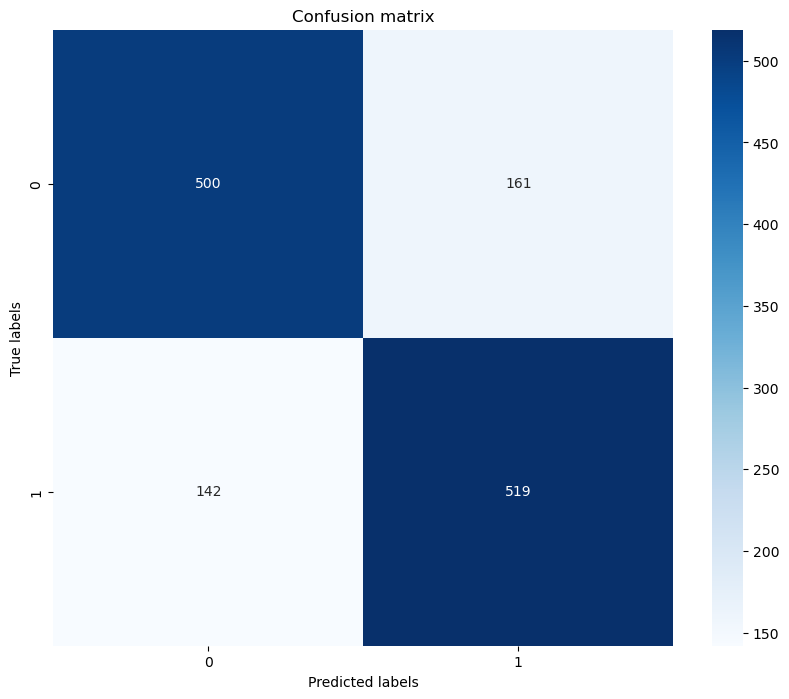

In [82]:
y_pred = adaboost.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)

In [85]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=200)
adaboost.fit(X_train_norm2, y_train)

c:\Users\Lidia Mayor\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=200)

Accuracy: 0.6059001512859304
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       661
           1       0.99      0.21      0.35       661

    accuracy                           0.61      1322
   macro avg       0.78      0.61      0.53      1322
weighted avg       0.78      0.61      0.53      1322



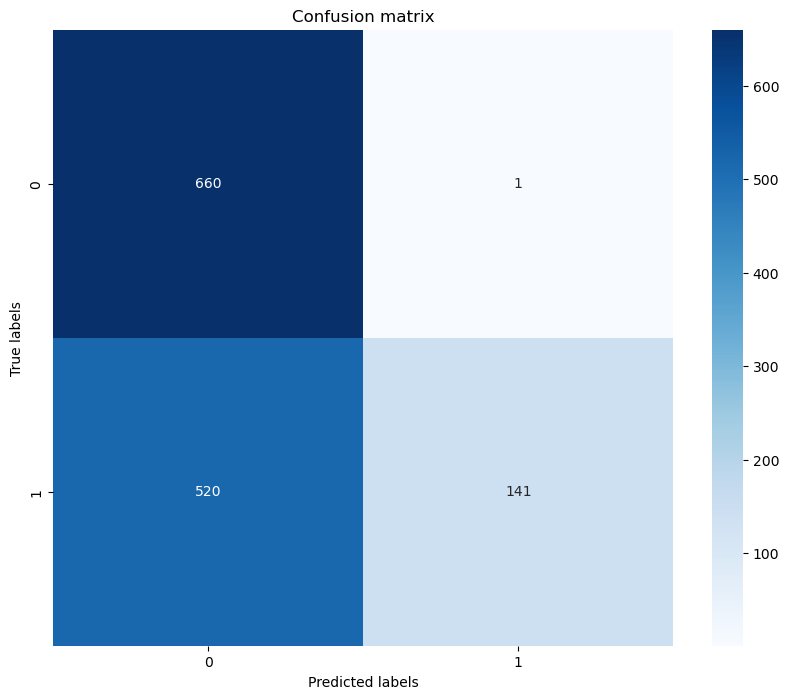

In [86]:
y_pred2 = grd_boosting.predict(X_test_norm2)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
calcularMatrizConfusion(y_test, y_pred2)

Which model is the best and why?

Accuracy: 0.7859304084720121
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       661
           1       0.76      0.83      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



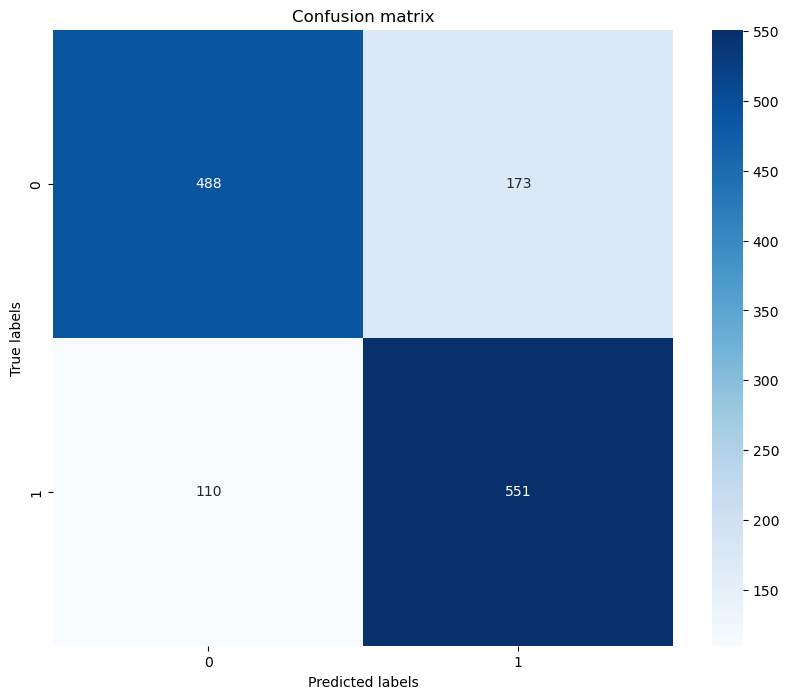

In [98]:
grd_boosting = GradientBoostingClassifier(n_estimators=100)
grd_boosting.fit(X_train_norm, y_train)
y_pred = grd_boosting.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)